In [3]:
# =========================

# 💼 Importación de Librerías

# =========================

# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.preprocessing import StandardScaler

# Modelos de clustering y reducción de dimensionalidad
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import hdbscan

# Métricas de evaluación
from sklearn.metrics import (
  silhouette_score,
  calinski_harabasz_score,
  adjusted_rand_score
)

# Utilidades
from sklearn.datasets import make_blobs

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [4]:
# Importar dataset

df = pd.read_csv("hf://datasets/polinaeterna/tabular-benchmark/clf_cat/covertype.csv")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
# Análisis general
df.shape

(423680, 55)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423680 entries, 0 to 423679
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           423680 non-null  float64
 1   Aspect                              423680 non-null  float64
 2   Slope                               423680 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    423680 non-null  float64
 4   Vertical_Distance_To_Hydrology      423680 non-null  float64
 5   Horizontal_Distance_To_Roadways     423680 non-null  float64
 6   Hillshade_9am                       423680 non-null  int64  
 7   Hillshade_Noon                      423680 non-null  int64  
 8   Hillshade_3pm                       423680 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  423680 non-null  float64
 10  Wilderness_Area1                    423680 non-null  int64  
 11  Wilderness_Area2          

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,423680.0,3024.767025,201.615937,2142.0,2899.0,3037.0,3179.0,3686.0
Aspect,423680.0,154.075965,112.265872,0.0,56.0,124.0,259.0,360.0
Slope,423680.0,13.332215,6.972801,0.0,8.0,12.0,17.0,66.0
Horizontal_Distance_To_Hydrology,423680.0,275.084248,213.439101,0.0,108.0,228.0,391.0,1390.0
Vertical_Distance_To_Hydrology,423680.0,43.995844,57.038281,-166.0,6.0,27.0,65.0,598.0
Horizontal_Distance_To_Roadways,423680.0,2521.057036,1562.523298,0.0,1260.0,2220.0,3541.0,7117.0
Hillshade_9am,423680.0,212.931014,24.889943,0.0,200.0,218.0,231.0,254.0
Hillshade_Noon,423680.0,224.374799,18.366811,0.0,214.0,227.0,237.0,254.0
Hillshade_3pm,423680.0,143.415351,36.141922,0.0,121.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,423680.0,2087.911811,1334.918363,0.0,1140.0,1834.0,2647.0,7172.0


In [8]:
# Verificar valores nulos
print(df.isnull().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [9]:
# Visualizar duplicados

print("\nDuplicados:", df.duplicated().sum())


Duplicados: 0


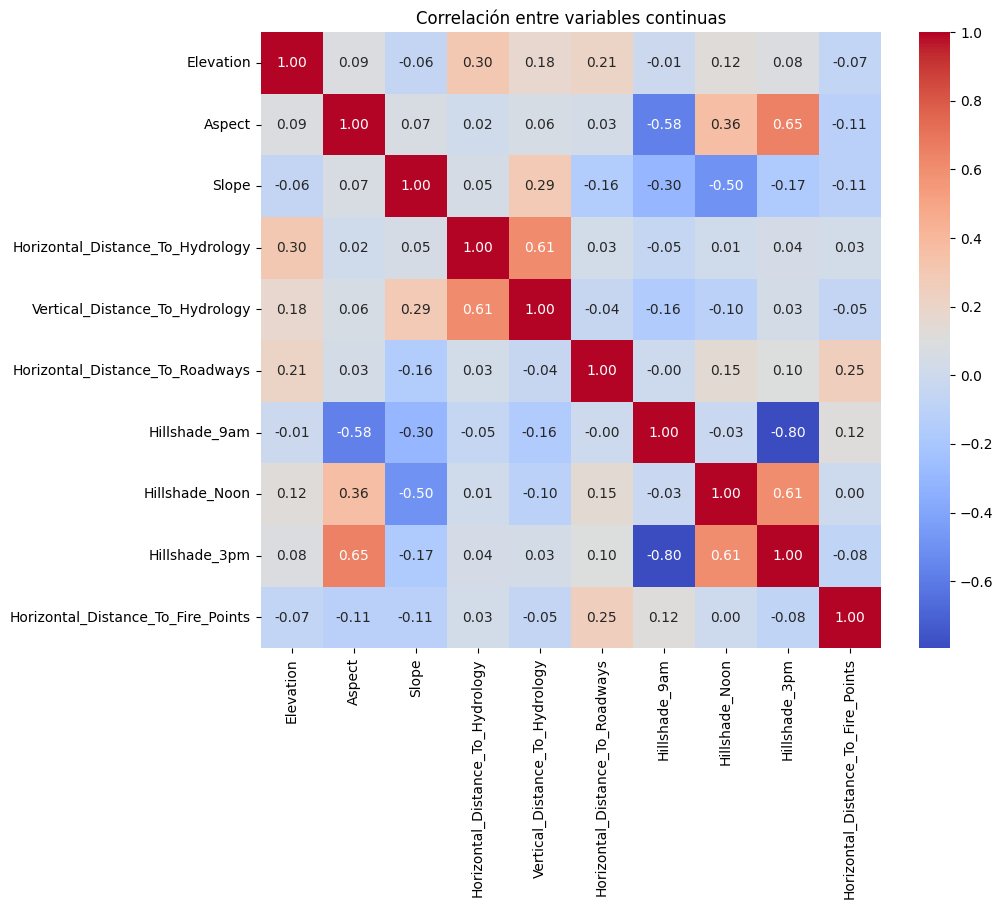

In [10]:
# Variables numéricas "reales"
cont_vars = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

plt.figure(figsize=(10, 8))
sns.heatmap(df[cont_vars].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre variables continuas")
plt.show()

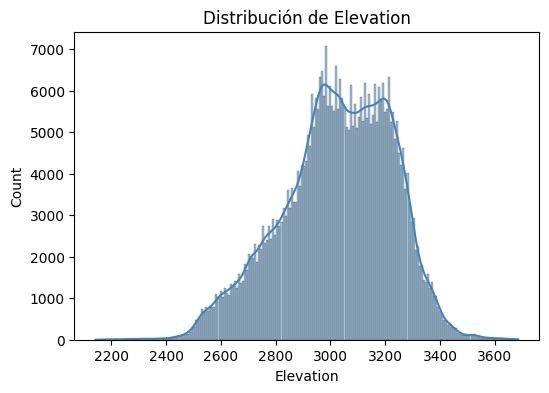

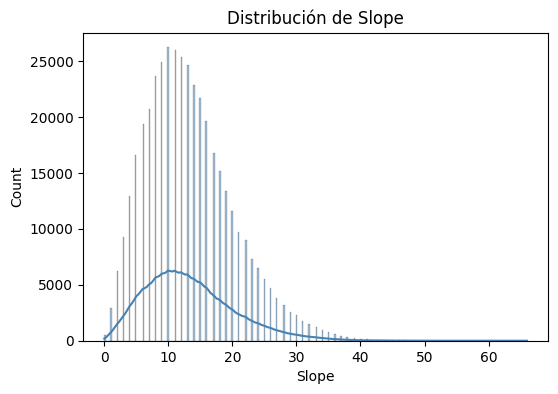

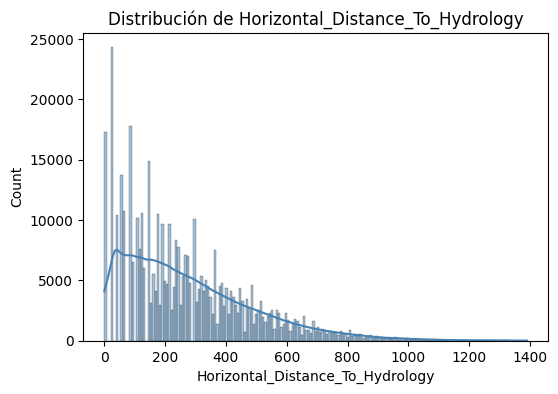

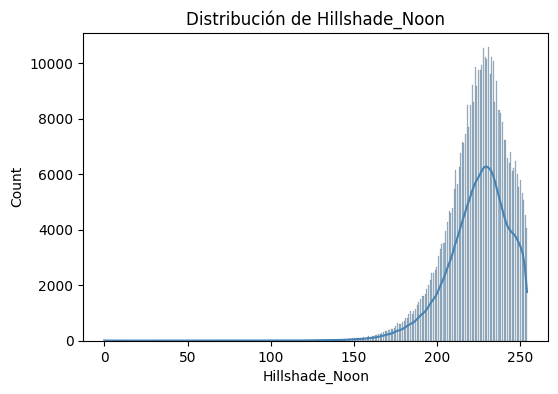

In [11]:
cols_to_plot = ['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Hillshade_Noon']

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(f'Distribución de {col}')
    plt.show()

In [12]:
print(df[[f'Wilderness_Area{i}' for i in range(1,5)]].sum())
print(df[[f'Soil_Type{i}' for i in range(1,41)]].sum().head())

Wilderness_Area1    215078
Wilderness_Area2     25296
Wilderness_Area3    181036
Wilderness_Area4      2270
dtype: int64
Soil_Type1       0
Soil_Type2     625
Soil_Type3     883
Soil_Type4    2582
Soil_Type5       0
dtype: int64


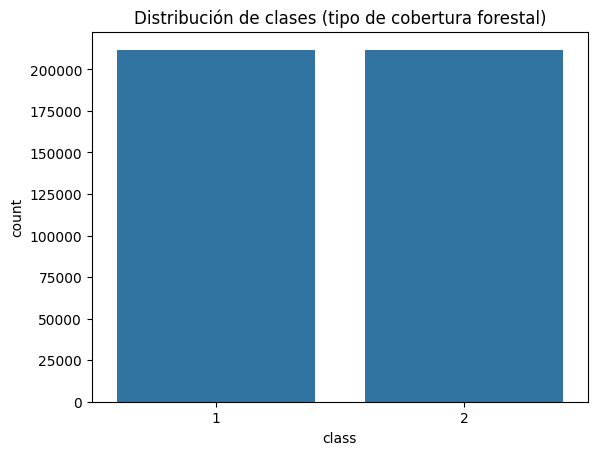

In [13]:
sns.countplot(x='class', data=df)
plt.title("Distribución de clases (tipo de cobertura forestal)")
plt.show()

## Análisis Exploratorio de Datos (EDA) — Conclusiones

Durante el análisis exploratorio se observaron las siguientes características del conjunto de datos:

**Estructura general:**

El dataset contiene 423 680 observaciones y 55 variables, de las cuales 10 son numéricas continuas (relacionadas con el relieve y distancias), 4 representan áreas silvestres (variables binarias), 40 corresponden a tipos de suelo (también binarias) y una variable class indica el tipo de cobertura forestal.

**Valores faltantes:**
No se detectaron valores nulos ni duplicados, por lo que los datos están completos.

**Correlaciones:**
Las variables continuas presentan correlaciones moderadas entre sí, especialmente entre las distancias y los valores de Hillshade. Sin embargo, no se observan correlaciones tan altas como para eliminar variables, por lo que se conservarán todas para el análisis posterior.

**Distribución de variables numéricas:**

`Elevation` tiene una distribución unimodal, concentrada entre altitudes medias.

`Slope` y las distancias presentan distribuciones sesgadas hacia valores bajos, lo cual es esperable en terrenos predominantemente planos y cercanos a cuerpos de agua.

`Hillshade_Noon` muestra una concentración fuerte alrededor de ciertos valores, indicando condiciones similares de exposición solar.

**Variable objetivo (class):**
Existen dos clases mayoritarias con proporciones similares, mientras que las demás presentan menos observaciones. Este leve desbalance no afecta el análisis, ya que el enfoque es no supervisado (clustering).

**Conclusión general:**
El conjunto de datos se encuentra limpio y listo para preprocesamiento.
Debido a las diferentes escalas y unidades de medida de las variables continuas, se aplicará escalado estandarizado (StandardScaler) antes de ejecutar los algoritmos de agrupamiento (K-Means, DBSCAN y Gaussian Mixture).
Además, se considerará una reducción de dimensionalidad con PCA para facilitar la visualización de los clusters.

## Aplicando PCA

In [14]:
# Separar variables predictoras de variable objetivo
X = df.drop('class', axis=1)  # características
y = df['class']  # variable objetivo

In [15]:
# Estandarizar los datos (CRUCIAL para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Eliminar columnas con varianza cero
zero_variance_cols = X.columns[X.std() == 0]
X_filtered = X.drop(zero_variance_cols, axis=1)

# Escalado
X_scaled = scaler.fit_transform(X_filtered)
print(f"Columnas eliminadas: {zero_variance_cols.tolist()}")

Columnas eliminadas: ['Soil_Type1', 'Soil_Type5', 'Soil_Type14', 'Soil_Type15', 'Soil_Type37']


In [17]:
# Aplicar PCA exploratorio
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [18]:
# Analizar componentes principales
explained_variance = pca.explained_variance_ratio_
acumulative_variance = np.cumsum(explained_variance)

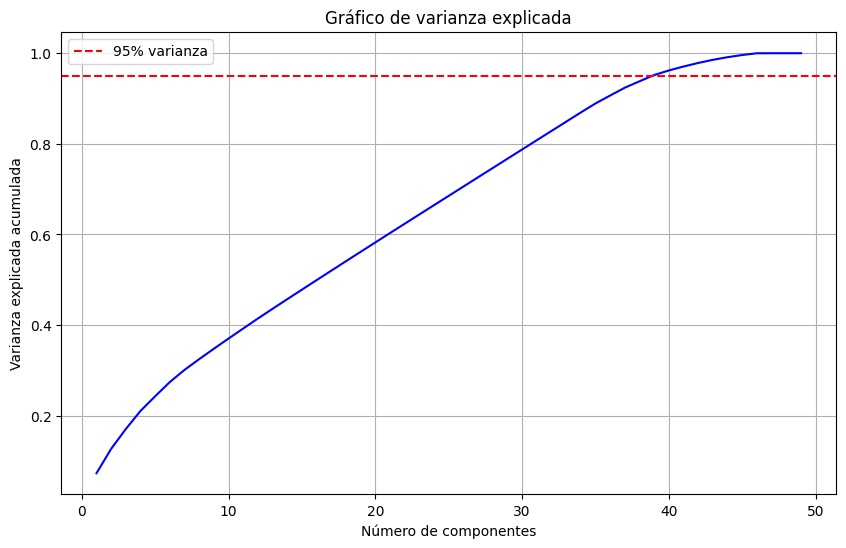

In [19]:
# Gráfico de varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(acumulative_variance) + 1), acumulative_variance, 'b-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Gráfico de varianza explicada')
plt.legend()
plt.grid(True)
plt.show()

El gráfico indica que para alcanzar el 95% de la varianza explicada se necesitan aproximadamente 40 componentes.

In [20]:
# Mostrar varianza explicada por los primeros componentes
print("Varianza explicada por los primeros 10 componentes:")
for i in range(10):
    print(f"Componente {i+1}: {explained_variance[i]:.4f} ({acumulative_variance[i]:.4f} acumulada)")

Varianza explicada por los primeros 10 componentes:
Componente 1: 0.0729 (0.0729 acumulada)
Componente 2: 0.0540 (0.1269 acumulada)
Componente 3: 0.0437 (0.1706 acumulada)
Componente 4: 0.0400 (0.2105 acumulada)
Componente 5: 0.0323 (0.2429 acumulada)
Componente 6: 0.0314 (0.2743 acumulada)
Componente 7: 0.0268 (0.3011 acumulada)
Componente 8: 0.0237 (0.3248 acumulada)
Componente 9: 0.0230 (0.3478 acumulada)
Componente 10: 0.0225 (0.3702 acumulada)


Los 10 primeros componentes explican un ~37% de la varianza acumulada.

In [21]:
# Aplicar PCA con 40 componentes
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)

(423680, 39)


In [22]:
pca.n_components_

np.int64(39)

## Aplicar algoritmos

In [23]:
# Función auxiliar para evaluar modelos
def evaluar_modelo(nombre, etiquetas, X):
  n_clusters = len(set(etiquetas)) - (1 if -1 in etiquetas else 0)
  if n_clusters > 1:
    sil = silhouette_score(X, etiquetas)
    cal = calinski_harabasz_score(X, etiquetas)
    print(f"{nombre}")
    print(f"   Número de clusters: {n_clusters}")
    print(f"   Índice de Silhouette: {sil:.4f}")
    print(f"   Índice de Calinski-Harabasz: {cal:.2f}\n")
  else:
    print(f"{nombre}: No se puede calcular métricas (solo un cluster o ruido).")

<function matplotlib.pyplot.show(close=None, block=None)>

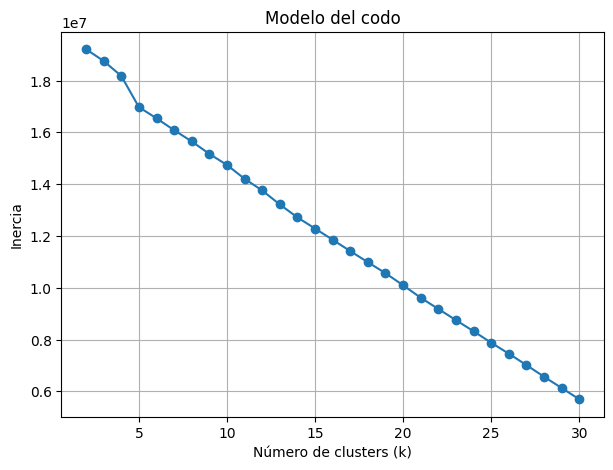

In [22]:
# Método del codo

inertia = []

K = range(2, 31)

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42).fit(X_pca)
  inertia.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(7, 5))
plt.plot(K, inertia, marker='o', linestyle='-')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Modelo del codo")
plt.grid(True)
plt.show

Se aplicó el método del codo hasta con 31 muestras para determinar el número de clusters y considerando que ya se aplicó también PCA, aún así sigue sin presentarse un punto claro de curva, lo que podría indicar que los datos son demasiado homogéneos y continuos, sin grupos naturales definidos.

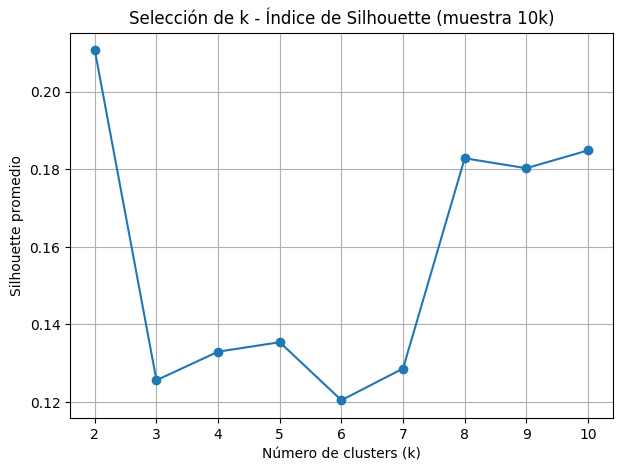

In [23]:
# Índice de Silhouette con muestra de 10.000 datos

sample_idx = np.random.choice(len(X_pca), size=10000, replace=False)
X_sample = X_pca[sample_idx]

K = range(2, 11)
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_sample)
    score = silhouette_score(X_sample, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(7,5))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette promedio')
plt.title('Selección de k - Índice de Silhouette (muestra 10k)')
plt.grid(True)
plt.show()


Considerando que el método del codo no entregó un resultado satisfactorio, se aplicó índice de silueta con una muestra aleatoria de diez mil filas, pero tampoco indicó una respuesta satisfactoria.

Se aplicará K-means con 2 K para revisar resultados, pero se hará enfoque en otros métodos de clasificación como DBSCAN y GMM

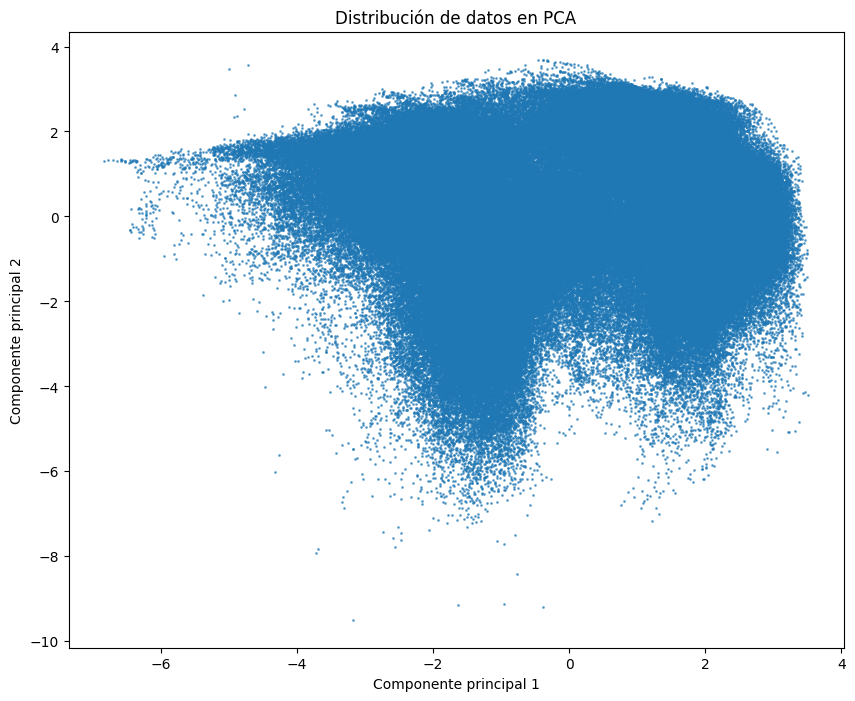

In [31]:
# Gráfica de dispersión para ver la estructura real
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=1)
plt.title("Distribución de datos en PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()

In [30]:
print(f"Varianza por componente PCA: {np.var(X_pca, axis=0)}")

Varianza por componente PCA: [3.57211854 2.6441665  2.14209746 1.95818968 1.58476136 1.54022837
 1.31150584 1.16202418 1.12634131 1.10019186 1.08927834 1.07833609
 1.05190376 1.04043905 1.03211352 1.02779908 1.02370462 1.02268297
 1.01700795 1.01403746 1.01164937 1.00891173 1.00764939 1.00505689
 1.00451353 1.00424423 1.00396839 1.00306045 1.00261967 1.00251028
 1.00167093 1.0007455  1.00023998 1.00016212 0.9763458  0.85728977
 0.84613633 0.69187724 0.67686399]


In [26]:
# K-Means

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

evaluar_modelo("K-Means", kmeans_labels, X_pca)

K-Means
   Número de clusters: 2
   Índice de Silhouette: 0.1799
   Índice de Calinski-Harabasz: 12234.78



In [29]:
# Tomar los dos primeros componentes del PCA
X_pca_2d = X_pca[:, :2]

# Ajustar KMeans nuevamente (por si no tienes el modelo en memoria)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_pca_2d)

# Graficar los clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='viridis', s=10, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroides')
plt.title('Clusters formados por K-Means (proyección PCA 2D)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 

In [27]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=2, random_state=42)

In [25]:
print("Forma de X_scaled:", X_scaled.shape)
print("Forma de X_pca:", X_pca.shape)

Forma de X_scaled: (423680, 49)
Forma de X_pca: (423680, 39)


In [28]:
labels = clusterer.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f'Clusters encontrados: {n_clusters}')
print(f'Puntos ruido: {n_noise}')

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=3)
plt.title('Clusters detectados con HDBSCAN')
plt.show()

NameError: name 'clusterer' is not defined

In [32]:
labels = clusterer.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Clusters detectados: {n_clusters}')
print(f'Puntos considerados ruido: {n_noise} ({n_noise / len(labels) * 100:.2f}%)')


NameError: name 'clusterer' is not defined

In [33]:
# Filtramos el ruido (-1)
mask = labels != -1
sil_score = silhouette_score(X_pca[mask], labels[mask])
print(f'Silhouette score: {sil_score:.3f}')


KeyboardInterrupt: 

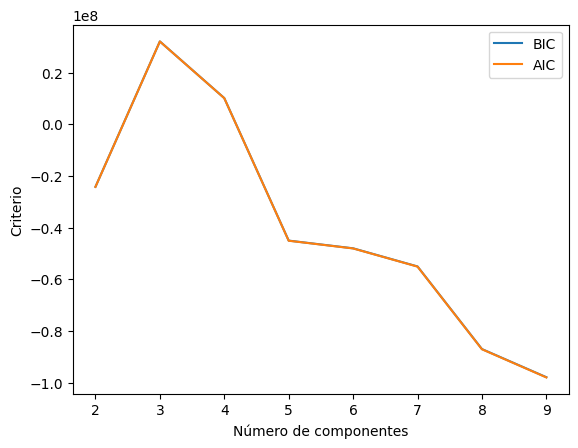

In [34]:
n_components = np.arange(2, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(X_pca)
          for n in n_components]

bics = [m.bic(X_pca) for m in models]
aics = [m.aic(X_pca) for m in models]

plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.xlabel('Número de componentes')
plt.ylabel('Criterio')
plt.legend()
plt.show()


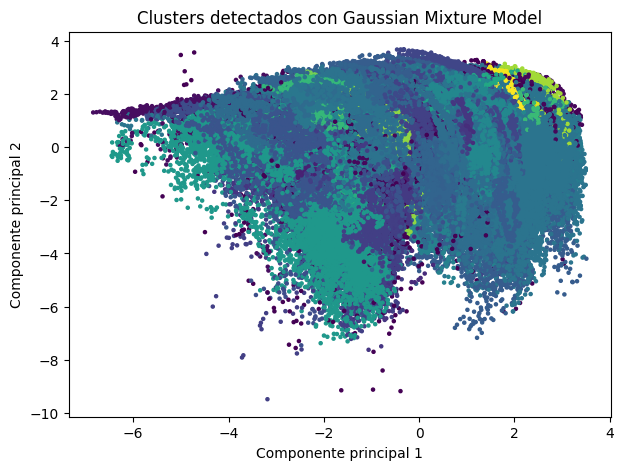

In [35]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=5, cmap='viridis')
plt.title('Clusters detectados con Gaussian Mixture Model')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()


In [2]:
sil_score = silhouette_score(X_pca, labels_gmm)
print(f'Silhouette score: {sil_score:.3f}')


NameError: name 'silhouette_score' is not defined